In [1]:
"""
Random Forest
Global Feature Selection 
    - X = 'Depth (m)', 'σ,v (kPa)', 'σ',v (kPa)', 'SBT (-)', 'SBTn (-)',
    'Mod. SBTn (-)', 'Oberhollenzer_classes', 'iso_classes_encoded'.

    
    - Y = 'qc (MPa)','fs (kPa)'.

Link: https://github.com/DowellChan/ResNetRegression
"""
#General Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler, CSVLogger
from sklearn.model_selection import train_test_split
import time

'''
PreProcessing
''' 
#Loading Database
df_cpt=pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Target_Encoded_Database.csv')

#Transforming to DataFrame
df_cpt = pd.DataFrame(df_cpt)
df_cpt = df_cpt.drop(columns='Unnamed: 0')

#Dropping zeros from qc
#df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] == 0).any(axis = 1)]
#df_cpt = df_cpt[~(df_cpt[['qc (MPa)']] < 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBT (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['SBTn (-)']] == 0).any(axis = 1)]
df_cpt = df_cpt[~(df_cpt[['Mod. SBTn (-)']] == 0).any(axis = 1)]

#Transforming to NumpyArray
df_cpt = df_cpt.to_numpy()

'''
Inputs
'''
X = df_cpt[:, [11, 17, 18, 19, 27]]

#1 --> 'Depth (m)' --> index: 1
#2 --> 'σ,v (kPa)' --> index: 9
#3 --> "σ',v (kPa)" --> index: 11
#4 --> 'SBT (-)' --> index: 17
#5 --> 'SBTn (-)' --> index: 18
#6 --> 'Mod. SBTn (-)' --> index: 19 
#7 --> 'Ic (-)' --> index: 21
#8 --> 'Ic SBT (-)' --> index:22 
#9 --> 'Ib (-)' --> index: 23
#10 --> 'Oberhollenzer_classes' --> index: 24
#11 --> 'iso_classes_encoded' --> index: 27

#X=X.to(device) #To GPU

'''
Outputs
'''
y = df_cpt[:, [2, 3]] 

#1 --> 'qc (MPa)' --> index: 2
#2 --> 'fs (kPa)' --> index: 3

#y=y.to(device) #To GPU

#Scaling the and preparing the data
#scalerX = MinMaxScaler()
#scalerY = MinMaxScaler()

#Scaling the Data
#scaledX=scalerX.fit_transform(X)
#scaledY=scalerY.fit_transform(y)

#Train & Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.20)

In [2]:
from sklearn.ensemble import RandomForestRegressor
#Random forest Model
model = RandomForestRegressor(bootstrap = 'True', n_estimators = 400, max_depth = 300,
                              min_samples_split = 15, min_samples_leaf = 2)


#Initial time
start_time = time.time()

#Fitting the model
model.fit(X_train, y_train)

#Final time
end_time = (time.time() - start_time)
print('The running time is: %.2f minutes' %(end_time/60))

The running time is: 17.31 minutes


In [3]:
#Making a prediction
y_pred = model.predict(X_test)

In [4]:
#Metrics Global
print('Metrics Global')
mae = mean_absolute_error(y_test, y_pred)
print('The mae is: %.4f' %mae)
mse = mean_squared_error(y_test, y_pred)
print('The mse is: %.4f' %mse)
rmse = np.sqrt(mse).mean()
print('The rmse is: %.4f' %rmse)
r2 = r2_score(y_test, y_pred)
print('The R2 is: %.4f' %r2)

print('____________________________________________')
#Metrics for the qc
print('Metrics for qc')
mae_qc = mean_absolute_error(y_test[:, 0], y_pred[:, 0])
print('The mae is: %.4f MPa' %mae_qc)
mse_qc = mean_squared_error(y_test[:, 0], y_pred[:, 0])
print('The mse is: %.4f MPa' %mse_qc)
rmse_qc = np.sqrt(mse).mean()
print('The rmse is: %.4f MPa' %rmse_qc)
r2_qc = r2_score(y_test[:, 0], y_pred[:, 0])
print('The R2 is: %.4f MPa' %r2_qc)

print('____________________________________________')

#Metrics for the fs
print('Metrics for fs')
mae_fs = mean_absolute_error(y_test[:, 1], y_pred[:, 1])
print('The mae is: %.4f kPa' %mae_fs)
mse_fs = mean_squared_error(y_test[:, 1], y_pred[:, 1])
print('The mse is: %.4f kPa' %mse_fs)
rmse_fs = np.sqrt(mse).mean()
print('The rmse is: %.4f kPa' %rmse_fs)
r2_fs= r2_score(y_test[:, 1], y_pred[:, 1])
print('The R2 is: %.4f kPa' %r2_fs)

Metrics Global
The mae is: 7.2901
The mse is: 452.2007
The rmse is: 21.2650
The R2 is: 0.8679
____________________________________________
Metrics for qc
The mae is: 0.8647 MPa
The mse is: 5.6839 MPa
The rmse is: 21.2650 MPa
The R2 is: 0.9162 MPa
____________________________________________
Metrics for fs
The mae is: 13.7154 kPa
The mse is: 898.7175 kPa
The rmse is: 21.2650 kPa
The R2 is: 0.8196 kPa


In [5]:
'''
Saving the Model
'''
import joblib

#Saving model as joblib file
import os
joblib.dump(model, 'CPT_RF_02_88_compress.joblib', compress = 3)
print(f"Compressed Random Forest: {np.round(os.path.getsize('CPT_RF_02_88_compress.joblib') / 1024 / 1024, 2) } MB")

Compressed Random Forest: 1159.28 MB


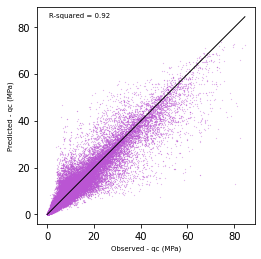

In [6]:
'''
Plots
'''
# 'qc (MPa)' 
plt.figure()
plt.scatter(y_test[:, 0], y_pred[:, 0], s = .1, c = 'mediumorchid', marker = '.')
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(y_pred[:, 0]), max(y_test[:, 0]))
p2 = min(min(y_pred[:, 0]), min(y_test[:, 0]))
plt.plot([p1, p2], [p1, p2], 'k-', lw = 1)
#plt.title('qc', fontsize = 13, fontweight = 'bold')
plt.xlabel('Observed - qc (MPa)', fontsize = 7)
plt.ylabel('Predicted - qc (MPa)', fontsize = 7)
plt.axis('scaled')
#plt.xlim(-10, 100)
#plt.ylim(-10, 100)
#plt.xlim(0, 1)
#plt.ylim(0, 1)
plt.text(27, 85, 'R-squared = %0.2f' %r2_qc, horizontalalignment = 'right', 
         verticalalignment = 'center', fontsize = 7)
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.savefig('qc_prediced.png', dpi = 600)
plt.show()

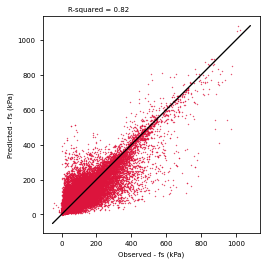

In [7]:
# 'fs (kPa)' 
plt.figure()
plt.scatter(y_test[:, 1], y_pred[:, 1], s = .5, c = 'crimson', marker = '.')
plt.yscale('linear')
plt.xscale('linear')
p1 = max(max(y_pred[:, 1]), max(y_test[:, 1]))
p2 = min(min(y_pred[:, 1]), min(y_test[:, 1]))
plt.plot([p1, p2], [p1, p2], 'k-', lw = 1)
plt.plot([p1, p2], [p1, p2], 'k-', lw = 1)
#plt.title('qc', fontsize = 13, fontweight = 'bold')
plt.xlabel('Observed - fs (kPa)', fontsize = 7)
plt.ylabel('Predicted - fs (kPa)', fontsize = 7)
plt.axis('scaled')
#plt.xlim(-10, 1500)
#plt.ylim(min(y_pred[:, 1]), 1500)
#plt.xlim(min(y_test[:, 1]), 1500)
#plt.ylim(0, 1)
plt.text(385, 1175, 'R-squared = %0.2f' %r2_fs, horizontalalignment = 'right', 
         verticalalignment = 'center', fontsize = 7)
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
#plt.savefig('fs_prediced.png', dpi = 600)
plt.show()

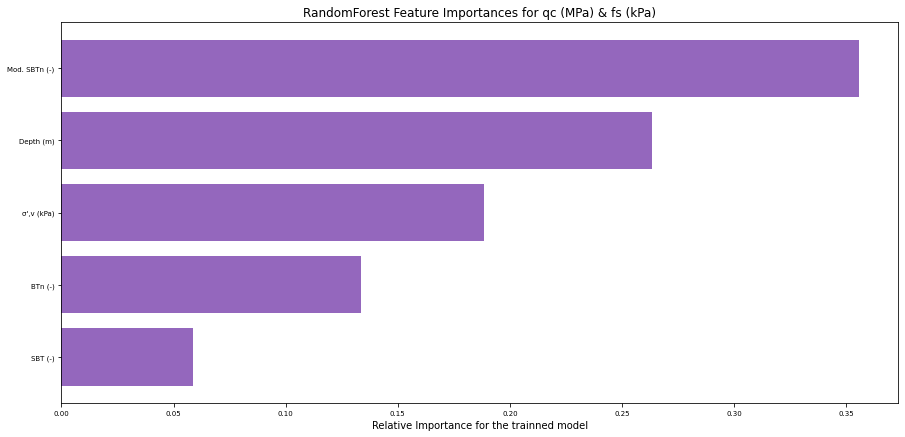

In [8]:
'''
Feature Importance
'''
#Features
features = pd.DataFrame(df_cpt[:, [1, 11, 17, 18, 19, 27]])

features = features.rename(columns = {0: 'Depth (m)', 1: "σ',v (kPa)", 2: 'SBT (-)',
                           3: 'BTn (-)', 4: 'Mod. SBTn (-)',
                           5: 'iso_classes_encoded'}).columns
features = features.to_numpy()

#Model importance for the trainned model
model_importance = model.feature_importances_ 

#Def plot for RandomForest
def plot_importance_RandomForest(importances):
    indices=np.argsort(importances)
    plt.figure(figsize = (15, 7))
    plt.title('RandomForest Feature Importances for qc (MPa) & fs (kPa)')
    plt.barh(range(len(indices)), importances[indices], color = 'tab:purple', align = 'center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance for the trainned model')
    plt.savefig('relative_importance_model.png', dpi = 300)
    plt.show()

#Plotting RandomForest
plot_importance_RandomForest(model_importance)

________________________________________________________________________________
**Qunatile Regression** 
________________________________________________________________________________


In [9]:
#Each observation has N predictions from the N trees

#Qunatile for Qc
pred_Qc = pd.DataFrame()
for pred in model.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2)[:,0])
    pred_Qc = pd.concat([pred_Qc,temp],axis=1)
pred_Qc.head()

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.52,0.53,0.52,0.51,0.53,0.55,0.53,0.53,0.55,0.51,0.51,0.52,0.53,0.52,0.52,0.55,0.52,0.53,0.54,0.52,0.54,0.53,0.54,0.52,0.53,0.54,0.53,0.53,0.53,0.52,0.54,0.52,0.53,0.53,0.53,0.52,0.53,0.52,0.52,0.53,...,0.54,0.51,0.52,0.53,0.52,0.52,0.54,0.52,0.54,0.56,0.51,0.51,0.52,0.53,0.52,0.54,0.52,0.53,0.52,0.54,0.54,0.52,0.53,0.52,0.52,0.52,0.53,0.54,0.55,0.52,0.52,0.55,0.52,0.53,0.54,0.53,0.52,0.53,0.54,0.54
1,0.19,0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.19,0.19,0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.18,0.19,0.18,0.18,0.19,0.19,0.18,0.18,0.18,0.18,0.19,0.18,0.18,0.19,0.19,0.18,0.19,0.19,0.18,0.18,0.19,0.19,0.18,...,0.18,0.18,0.18,0.19,0.18,0.18,0.19,0.18,0.18,0.18,0.18,0.19,0.18,0.19,0.19,0.19,0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.18,0.18,0.19,0.18,0.18,0.18,0.18,0.18,0.18,0.19,0.18,0.19,0.18,0.18,0.19,0.18,0.18
2,0.89,0.75,0.75,0.77,0.94,0.90,0.75,0.76,0.89,0.76,0.76,0.75,0.95,0.86,0.88,0.95,0.76,0.87,0.75,0.75,0.94,0.88,0.87,0.92,0.92,0.77,0.75,1.41,0.78,0.79,0.92,0.87,0.87,0.94,0.76,0.90,1.25,0.74,0.77,0.77,...,0.89,0.75,0.74,0.76,0.88,0.75,0.95,0.89,0.97,0.87,0.75,0.91,0.88,0.76,0.90,0.91,0.90,0.77,0.88,0.75,0.86,1.52,0.77,0.93,0.91,0.91,0.87,0.87,0.88,0.87,0.88,0.94,0.75,0.87,1.01,0.93,0.75,0.77,1.01,0.76
3,1.89,1.73,1.62,1.73,1.69,1.85,1.86,1.74,1.88,1.48,1.74,1.68,1.59,1.60,1.79,1.32,1.90,1.74,1.52,1.90,1.85,1.86,1.92,1.89,1.64,1.28,1.58,1.75,2.13,1.78,1.78,1.56,1.89,1.83,1.59,1.84,1.61,1.70,1.85,1.80,...,1.94,1.88,1.73,1.90,1.98,1.80,1.93,1.31,1.38,1.90,1.83,1.93,1.66,1.92,1.81,1.84,1.85,1.78,1.65,1.54,1.53,1.78,1.83,1.59,1.48,1.85,1.93,1.87,1.94,1.77,1.79,1.46,1.75,1.94,1.54,1.86,1.92,1.78,1.54,1.93
4,2.57,2.64,2.89,2.61,2.64,2.52,3.60,2.27,2.66,2.78,2.84,2.55,2.86,2.84,2.54,2.50,2.53,2.58,2.66,3.12,2.88,3.12,3.23,2.86,2.35,2.53,2.94,2.65,2.60,2.67,2.81,2.63,2.83,2.28,2.81,2.46,2.61,2.73,2.53,2.47,...,2.79,2.50,3.50,2.81,3.18,2.76,2.79,2.64,2.63,2.83,2.75,2.64,2.40,2.54,2.67,2.52,2.68,3.06,2.53,2.82,2.62,2.61,2.79,2.65,3.20,3.48,2.59,2.79,2.72,2.86,2.63,3.45,2.70,3.12,3.35,2.77,2.70,2.65,2.70,2.87


In [10]:
#Defining quantile and the function for qc
quantiles = [0.01, 0.05, 0.50, 0.95 , 0.99]

RF_actual_pred_qc = pd.DataFrame()

for q in quantiles:
    s = pred_Qc.quantile(q=q, axis=1)
    RF_actual_pred_qc = pd.concat([RF_actual_pred_qc,s],axis=1,sort=False)
   
RF_actual_pred_qc.columns=quantiles
RF_actual_pred_qc['actual'] = y_test[:,0]
RF_actual_pred_qc['interval'] = RF_actual_pred_qc[np.max(quantiles)] - RF_actual_pred_qc[np.min(quantiles)]
RF_actual_pred_qc = RF_actual_pred_qc.sort_values('interval')
RF_actual_pred_qc = RF_actual_pred_qc.round(2)
RF_actual_pred_qc

,0.01,0.05,0.5,0.95,0.99,actual,interval
68757,1.48,1.48,1.48,1.48,1.48,1.49,0.00
143686,0.46,0.46,0.46,0.46,0.46,0.46,0.00
86455,0.26,0.26,0.26,0.26,0.26,0.26,0.00
57407,0.91,0.91,0.91,0.91,0.91,0.91,0.00
32872,0.46,0.46,0.46,0.46,0.46,0.45,0.00
...,...,...,...,...,...,...,...
93,15.11,53.60,64.12,72.72,73.56,69.25,58.45
5594,14.97,55.38,67.52,73.32,73.56,73.69,58.59
149460,7.15,9.64,49.10,63.93,66.69,6.53,59.55
93046,6.97,8.09,43.66,62.54,66.58,5.90,59.61


In [11]:
#Function for the intervals

def showIntervals(df):    
    plt.plot(df['actual'],'o',markersize=.1,label='Actual')  
    plt.fill_between(
        np.arange(df.shape[0]), df[0.01], df[0.99], alpha=0.7, color="r",
        label="Predicted interval")
    plt.xlabel("Ordered samples.")
    plt.ylabel("Values and prediction intervals.")
    #plt.xlim([-10, 175000])
    #plt.ylim([-10, 100])
    plt.legend()
    plt.savefig('oredered_qc.png', dpi = 300)
    plt.show()

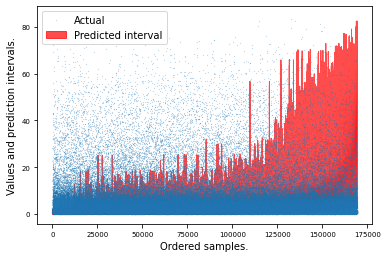

In [12]:
#Plot the interval for qc
showIntervals(RF_actual_pred_qc)

In [13]:
#Metrics
from sklearn import metrics

r2_qc = metrics.r2_score(RF_actual_pred_qc['actual'], RF_actual_pred_qc[0.5]).round(2)
print('R2 score is {}'.format(r2_qc))

R2 score is 0.91


In [14]:
#Function to avalueate the % of points in the interval of prediction
def correctPcnt(df):
    correct = 0
    obs = df.shape[0]
    for i in range(obs):
        if df.loc[i,0.01] <= df.loc[i,'actual'] <= df.loc[i,0.99]:
            correct += 1
    print(correct/obs)

In [15]:
#Values in the interval of predictions for qc  
correctPcnt(RF_actual_pred_qc)

0.6927019597410659


In [16]:
#Each observation has N predictions from the N trees

#Qunatile for fs
pred_fs = pd.DataFrame()
for pred in model.estimators_:
    temp = pd.Series(pred.predict(X_test).round(2)[:,1])
    pred_fs = pd.concat([pred_fs,temp],axis=1)
pred_fs.head()

,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,8.76,8.81,8.56,8.38,8.81,9.93,8.54,9.48,10.20,8.52,8.34,8.02,8.27,8.05,9.09,10.29,8.85,8.70,9.73,8.88,9.86,9.35,9.45,8.57,9.21,9.76,9.94,9.54,8.88,8.10,9.54,9.49,9.73,9.64,9.19,8.88,9.61,8.19,8.67,8.35,...,9.58,8.73,8.27,8.92,8.62,9.30,9.36,8.22,10.21,9.55,8.72,8.61,8.26,9.28,8.82,10.05,8.78,9.35,9.49,9.97,9.79,8.71,8.92,9.05,8.93,8.33,9.61,9.87,9.13,8.94,8.91,10.66,9.39,9.70,8.98,9.15,8.72,9.18,10.06,9.81
1,3.38,3.37,3.35,3.32,3.36,3.34,3.49,3.40,3.32,3.35,3.39,3.30,3.33,3.42,3.48,3.35,3.38,3.35,3.40,3.30,3.47,3.40,3.33,3.36,3.38,3.32,3.33,3.47,3.51,3.37,3.32,3.32,3.31,3.30,3.33,3.41,3.53,3.38,3.32,3.30,...,3.43,3.37,3.46,3.38,3.54,3.41,3.36,3.33,3.31,3.39,3.38,3.32,3.33,3.35,3.41,3.43,3.35,3.33,3.38,3.36,3.32,3.30,3.35,3.31,3.40,3.32,3.31,3.31,3.34,3.30,3.40,3.33,3.42,3.28,3.37,3.42,3.40,3.38,3.31,3.45
2,11.96,6.23,5.70,6.22,11.80,10.66,6.47,6.59,11.41,5.85,5.74,5.70,9.29,10.57,11.46,8.26,6.33,11.30,6.40,6.20,10.07,10.39,11.28,10.22,11.44,5.37,6.22,24.30,6.16,5.30,9.83,10.12,9.11,10.73,6.11,9.88,22.19,5.86,6.07,5.66,...,11.21,5.97,6.16,6.17,11.11,6.68,8.92,11.86,9.37,10.43,5.90,9.45,10.84,7.26,10.79,10.64,12.06,6.14,10.70,5.87,9.68,25.85,6.08,10.81,7.87,10.91,11.42,10.44,10.69,10.87,10.47,10.67,6.33,11.64,10.55,10.59,6.24,5.78,10.76,6.15
3,33.34,26.40,24.93,35.07,22.15,31.30,27.05,30.12,28.91,23.30,22.63,23.07,22.91,22.56,26.90,18.55,27.73,38.80,23.75,30.11,28.88,25.01,29.71,28.88,24.24,20.34,24.08,25.98,35.39,32.29,26.43,27.84,30.40,26.72,23.99,27.62,21.94,23.31,26.45,26.58,...,32.05,27.70,28.20,27.98,31.61,34.85,29.86,19.90,22.35,29.02,25.80,30.79,21.44,29.32,25.63,27.07,29.07,23.94,23.33,25.70,19.10,28.36,26.58,23.65,22.48,27.72,34.20,30.53,30.50,26.43,26.75,20.75,31.98,31.88,23.76,31.13,28.30,24.72,22.43,29.53
4,35.11,37.81,40.71,49.58,37.05,34.39,57.07,34.27,38.76,38.12,39.91,35.78,41.78,51.98,34.70,34.31,34.90,35.65,40.23,48.65,43.83,53.67,52.89,44.71,37.26,34.79,45.16,37.42,37.98,38.95,40.03,37.44,52.86,35.49,42.86,37.00,37.24,53.01,35.57,34.92,...,48.81,35.13,62.20,39.60,54.26,36.72,50.91,37.17,37.19,39.20,47.90,39.01,37.22,34.83,37.64,34.53,36.43,47.81,35.49,51.71,35.60,38.67,55.15,37.99,47.81,62.92,35.83,51.53,49.46,40.73,38.18,58.64,39.75,50.96,57.78,39.21,37.57,36.41,38.75,51.57


In [17]:
#Defining quantile and the function for fs
RF_actual_pred_fs = pd.DataFrame()

for q in quantiles:
    s = pred_fs.quantile(q=q, axis=1)
    RF_actual_pred_fs = pd.concat([RF_actual_pred_fs,s],axis=1,sort=False)
   
RF_actual_pred_fs.columns=quantiles
RF_actual_pred_fs['actual'] = y_test[:, 1]
RF_actual_pred_fs['interval'] = RF_actual_pred_fs[np.max(quantiles)] - RF_actual_pred_fs[np.min(quantiles)]
RF_actual_pred_fs = RF_actual_pred_fs.sort_values('interval')
RF_actual_pred_fs = RF_actual_pred_fs.round(2)
RF_actual_pred_fs

,0.01,0.05,0.5,0.95,0.99,actual,interval
153853,6.10,6.10,6.10,6.10,6.10,6.1,0.00
114696,14.00,14.00,14.00,14.00,14.00,14.0,0.00
91321,6.10,6.10,6.10,6.10,6.10,6.1,0.00
139951,14.00,14.00,14.00,14.00,14.00,14.0,0.00
151732,14.00,14.00,14.00,14.00,14.00,14.0,0.00
...,...,...,...,...,...,...,...
55577,29.73,31.12,446.60,862.80,862.80,30.4,833.07
36833,29.73,31.03,446.60,862.80,862.80,31.3,833.07
107732,29.73,31.03,446.60,862.80,862.80,31.3,833.07
90512,27.91,29.13,33.70,862.80,862.80,32.2,834.89


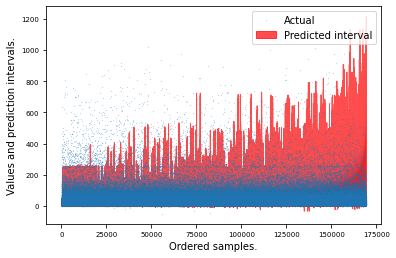

In [18]:
#Plot the interval for fs
showIntervals(RF_actual_pred_fs)

In [19]:
#R2 of the process for fs
r2_fs = metrics.r2_score(RF_actual_pred_fs['actual'], RF_actual_pred_fs[0.5]).round(2)
print('R2 score is {}'.format(r2_fs))

R2 score is 0.82


In [20]:
#Values in the interval of predictions for fs
correctPcnt(RF_actual_pred_fs)

0.6819958026661938


________________________________________________________________________________
Trying out different 

http://seaborn.pydata.org/generated/seaborn.jointplot.html
________________________________________________________________________________

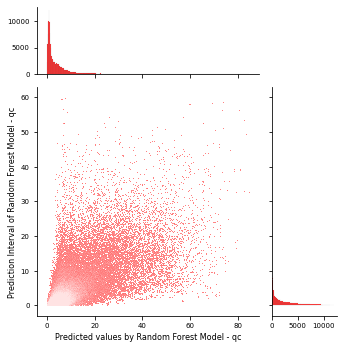

In [21]:
#Plotting Intervals for qc
import seaborn as sns
#Data
x_data_qc, y_data_qc = RF_actual_pred_qc['actual'], RF_actual_pred_qc['interval']

#Jointplot
ax = sns.jointplot(x = x_data_qc, y
              = y_data_qc, height = 5, ratio = 3, marginal_ticks = True, color = 'red', marker = '.', s = 4)
ax.set_axis_labels('Predicted values by Random Forest Model - qc', 'Prediction Interval of Random Forest Model - qc', fontsize = 8)

plt.savefig('qc_Intervals', dpi = 600)

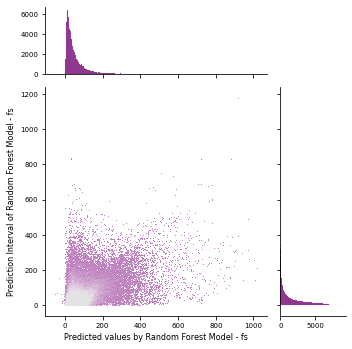

In [22]:
#Plotting Intervals for fs
import scipy.stats as stat
#Data
x_data_fs, y_data_fs = RF_actual_pred_fs['actual'], RF_actual_pred_fs['interval']

#Jointplot
ax = sns.jointplot(x = x_data_fs, y
              = y_data_fs, height = 5, ratio = 3, marginal_ticks = True, color = 'purple', marker = '.', s = 4)
ax.set_axis_labels('Predicted values by Random Forest Model - fs', 'Prediction Interval of Random Forest Model - fs', fontsize = 8)

plt.savefig('fs_Intervals', dpi = 600)